## **Importing main libraries**

In [25]:
# Importing data manipulation libraries
import pandas as pd
import numpy as np
# importing visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
# importing libraries for decision tree and random forest
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
# importing library for splitting the data between training and testig
from sklearn.model_selection import train_test_split

# importing library to ignore warnins
import warnings
warnings.filterwarnings('ignore')

### Data description
- **Cement:** measured in kg in a m3 mixture
- **Blast:** measured in kg in a m3 mixture **(slag)**
- **Fly ash:** measured in kg in a m3 mixture **(ash)**
- **Water:** measured in kg in a m3 mixture
- **Superplasticizer:** measured in kg in a m3 mixture
- **Coarse Aggregate:** measured in kg in a m3 mixture **(fineagg)**
- **Fine Aggregate:** measured in kg in a m3 mixture
- **Age:** day (1~365)
- **Concrete compressive strength measured in MPa (strength)**

### Importing dataset

In [26]:
# importing dataset
df = pd.read_csv('concrete.csv')
# reading first 5 rows and all the columns that could fit in the screen
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


## **EDA**

### Checking for missing values

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


**Observations:**
- There are a total of 1030 observations.
- All the features and caracteristics of the concrete on this dataset are of numeric nature.
- There are not missing values.
- There are not null values on the dataset.
- The target variable is going to be the strength of the concrete based on all the other features it posses or parameters.

### Summary statistics

In [28]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


**Observations:**
- The minimun and maximun weight of the concrete are 102 kg and 540 kg
- The blast may have a few outlier as the standard deviation is greater than the mean value so we need to check this, same for the fly ash.
- The average amount of water is about 181.6 kg.
- The maximun amount of superplastic is 32.2 kg
- There are some of the samples where the strength was measure as low as 1 day after the sample were made.
- The maximun recorded strength is 82.6 Mpa

### Visualizing the data

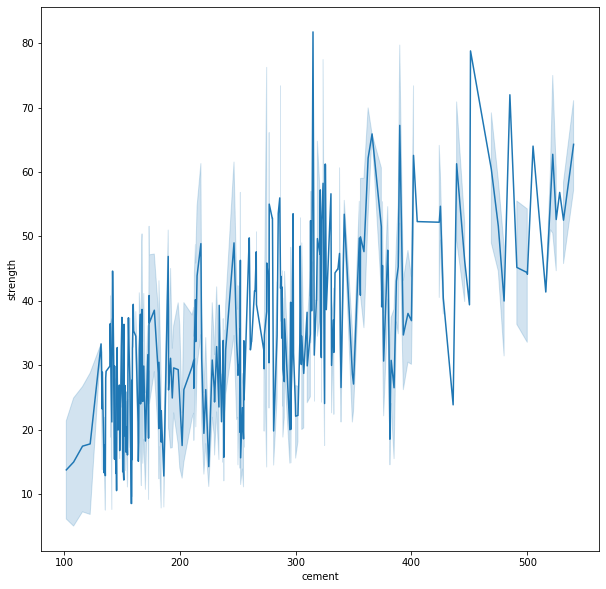

In [29]:
plt.figure(figsize = (10,10))
sns.lineplot(x = 'cement', y = 'strength', data = df)
plt.show()

**Observations:**
- From the plot above we can notice that the strength of the concrete increase with the amount of cement that we use, even though this is not always the cause because we need to take into consideration that the final strength on the concrete will depends on the mixture of all the aggregates not only the cement, and time.

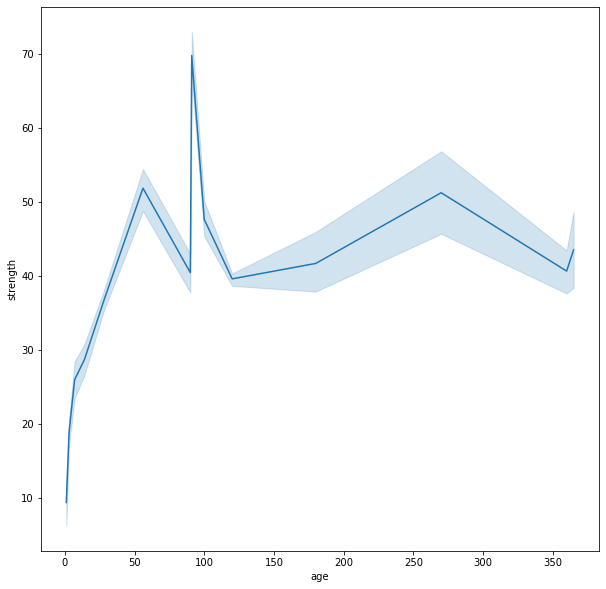

In [30]:
plt.figure(figsize = (10,10))
sns.lineplot(x = 'age', y = 'strength', data = df)
plt.show()

**Observations:**
- We can clearly notice that the strength of the concrete increase with the pass of time even thought there are some exceptions, which may be due to the aggregate combination.

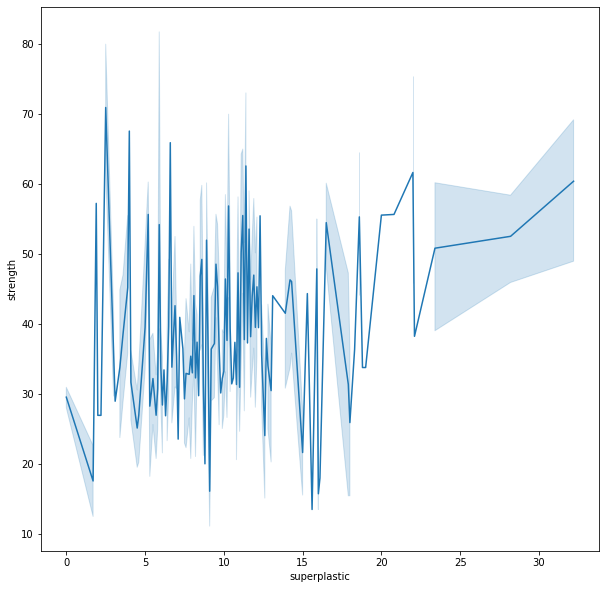

In [31]:
plt.figure(figsize = (10,10))
sns.lineplot(x = 'superplastic', y = 'strength', data = df)
plt.show()

**Observations:**
- The plot shows not clear patters on the increase of the concrete depending on the amount of superplastic, and the reason for this is because of the mixed aggregate, and also the function of the superplastic is to increase the strength of the concrete by reducing the amount of water needed, so the combination of water and superplastic are highly correlated.

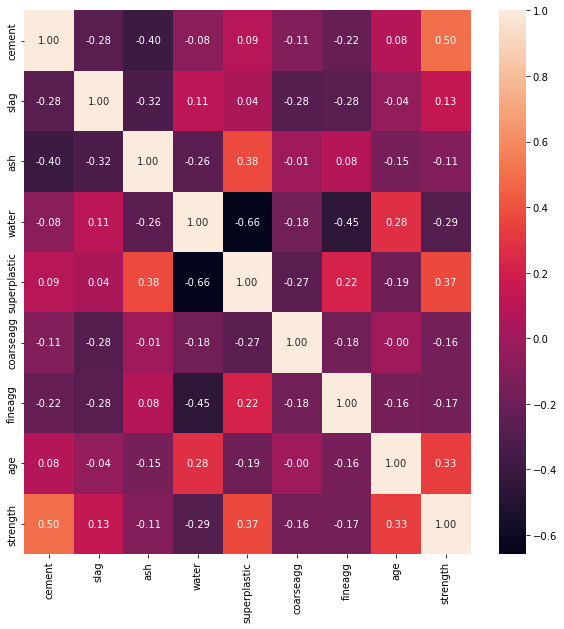

In [32]:
# creating the correlation variable to visualized the heatmap
corr_v = df.corr()
plt.figure(figsize = (10,10))
sns.heatmap(corr_v, annot = True, fmt = '.2f')
plt.show()

**Observations:**
- The feature with the more positive correlation with the strength is the cement as expected.
- The second feature that is more posivite correlated with the strength is the superplastic followed by the age.
- The water is negative correlated with the strenght of the concrete as expected due to the fact that we are using superplastic which reduce water to increase resistant.
- As well as superplastic and water being 66% negativitaly correlated

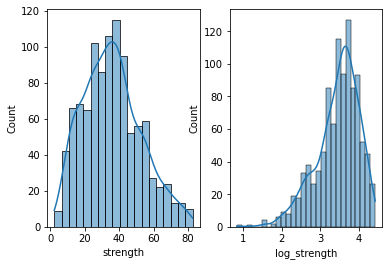

In [33]:
# creating log function for the target variable (strength)
df['log_strength'] = np.log(df['strength'])

# creting plots
fig, ax = plt.subplots(1,2)
sns.histplot(data = df, x = 'strength', kde = True, ax = ax[0])
sns.histplot(data = df, x = 'log_strength', kde = True, ax = ax[1])
plt.show()

**Observations:**
- We can notice that the log expression of our target variable is more skewed than the normal variable so we are going to stick with the normal strength as it resemble more a normal distribution.

## Preparing the data for modeling

In [34]:
# we need to seprate the data between features/independent and target variables/dependent

# creating independent variable
features  = df.drop(columns = ['strength', 'log_strength'])

# target variable/ dependent variable
target = df['strength']

In [35]:
# separating the data between train and test
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.20, random_state = 7)

## Modeling our data

**FIRST MODEL (Decision tree)**

In [36]:
# calling the function
model_1 = DecisionTreeRegressor()
# training the model
model_1.fit(x_train, y_train)

DecisionTreeRegressor()

In [37]:
# predicting the target variable
model_1_score = model_1.score(x_test, y_test)
model_1_score

0.8758737715798119

**Observations:**
- The first model have a 88% accurcary which makes it a really good model but we are going to try and improve it by changing the paramters.

### Hyperparameter tuning

In [38]:
parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7],
           "min_samples_leaf":[1,2,3,9],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4],
           "max_features":["auto","log2","sqrt"],
           "max_leaf_nodes":[10,20,30,40] }

In [39]:
tuning_model = GridSearchCV(model_1,param_grid=parameters,
                          scoring='neg_mean_squared_error',cv=3,verbose=3)

In [40]:
# training the model with the modified parameters
tuning_model.fit(x_train, y_train)

Fitting 3 folds for each of 1536 candidates, totalling 4608 fits
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-196.754 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-209.459 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-234.347 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-250.080 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-259.952 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.

[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-234.347 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-255.498 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-261.810 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-304.979 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-234.849 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-246.262 total time=   0.0s
[CV 3/3] E

[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-196.754 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-209.459 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-234.347 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-253.492 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-262.116 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-268.802 total time=   0.0s
[CV 1/3] E

[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=20, min_samples_leaf=9, min_weight_fraction_leaf=0.2, splitter=best;, score=-234.347 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=20, min_samples_leaf=9, min_weight_fraction_leaf=0.2, splitter=random;, score=-255.936 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=20, min_samples_leaf=9, min_weight_fraction_leaf=0.2, splitter=random;, score=-224.814 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=20, min_samples_leaf=9, min_weight_fraction_leaf=0.2, splitter=random;, score=-278.563 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=20, min_samples_leaf=9, min_weight_fraction_leaf=0.3, splitter=best;, score=-196.754 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=20, min_samples_leaf=9, min_weight_fraction_leaf=0.3, splitter=best;, score=-209.459 total time=   0.0s
[CV 3/3] E

[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-255.128 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-258.801 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-242.945 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=best;, score=-196.754 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=best;, score=-209.459 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=best;, score=-234.347 total time=   0.0s
[CV 1/3] E

[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=-309.530 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-196.754 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-209.459 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-234.347 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-264.160 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-250.960 total time=   0.0s
[CV 3/3] E

[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=40, min_samples_leaf=9, min_weight_fraction_leaf=0.3, splitter=random;, score=-266.395 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=40, min_samples_leaf=9, min_weight_fraction_leaf=0.4, splitter=best;, score=-234.849 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=40, min_samples_leaf=9, min_weight_fraction_leaf=0.4, splitter=best;, score=-246.262 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=40, min_samples_leaf=9, min_weight_fraction_leaf=0.4, splitter=best;, score=-247.664 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=40, min_samples_leaf=9, min_weight_fraction_leaf=0.4, splitter=random;, score=-251.192 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=40, min_samples_leaf=9, min_weight_fraction_leaf=0.4, splitter=random;, score=-271.166 total time=   0.0s
[CV 3/3] E

[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-242.785 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-306.271 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=best;, score=-252.998 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=best;, score=-209.459 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=best;, score=-244.105 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-256.981 total time=   0.0s
[CV 2/3] E

[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-211.140 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-254.797 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=-272.029 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=-271.166 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=-309.530 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-252.998 total time=   0.0s
[CV 2/3] E

[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=20, min_samples_leaf=9, min_weight_fraction_leaf=0.2, splitter=best;, score=-234.347 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=20, min_samples_leaf=9, min_weight_fraction_leaf=0.2, splitter=random;, score=-258.339 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=20, min_samples_leaf=9, min_weight_fraction_leaf=0.2, splitter=random;, score=-209.459 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=20, min_samples_leaf=9, min_weight_fraction_leaf=0.2, splitter=random;, score=-280.782 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=20, min_samples_leaf=9, min_weight_fraction_leaf=0.3, splitter=best;, score=-249.858 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=20, min_samples_leaf=9, min_weight_fraction_leaf=0.3, splitter=best;, score=-209.459 total time=   0.0s
[CV 3/3] E

[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-253.352 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-255.427 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-247.664 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-272.029 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-271.166 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-309.530 total time=   0.0s
[CV 1/3] E

[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-242.323 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-245.312 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-246.262 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-247.664 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-265.280 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-269.964 total time=   0.0s
[CV 3/3] E

[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=40, min_samples_leaf=9, min_weight_fraction_leaf=0.2, splitter=random;, score=-271.131 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=40, min_samples_leaf=9, min_weight_fraction_leaf=0.2, splitter=random;, score=-267.256 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=40, min_samples_leaf=9, min_weight_fraction_leaf=0.3, splitter=best;, score=-196.754 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=40, min_samples_leaf=9, min_weight_fraction_leaf=0.3, splitter=best;, score=-246.262 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=40, min_samples_leaf=9, min_weight_fraction_leaf=0.3, splitter=best;, score=-234.347 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=40, min_samples_leaf=9, min_weight_fraction_leaf=0.3, splitter=random;, score=-272.029 total time=   0.0s
[CV 2/3] E

[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=best;, score=-256.503 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=best;, score=-258.572 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=best;, score=-270.663 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-272.029 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-270.869 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-309.530 total time=   0.0s
[CV 1/3] E

[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-272.029 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-271.166 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-309.530 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-252.998 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-211.140 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-293.276 total time=   0.0s
[CV 1/3] E

[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=9, min_weight_fraction_leaf=0.2, splitter=random;, score=-309.530 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=9, min_weight_fraction_leaf=0.3, splitter=best;, score=-230.992 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=9, min_weight_fraction_leaf=0.3, splitter=best;, score=-216.270 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=9, min_weight_fraction_leaf=0.3, splitter=best;, score=-259.741 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=9, min_weight_fraction_leaf=0.3, splitter=random;, score=-263.664 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=9, min_weight_fraction_leaf=0.3, splitter=random;, score=-220.714 total time=   0.0s
[CV 3/3] E

[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=best;, score=-244.105 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-272.029 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-260.864 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-309.530 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-249.858 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-209.459 total time=   0.0s
[CV 3/3] E

[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-255.427 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-271.053 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-252.930 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-251.894 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-258.991 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-256.503 total time=   0.0s
[CV 2/3] E

[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=9, min_weight_fraction_leaf=0.3, splitter=random;, score=-219.009 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=9, min_weight_fraction_leaf=0.3, splitter=random;, score=-309.530 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=9, min_weight_fraction_leaf=0.4, splitter=best;, score=-234.849 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=9, min_weight_fraction_leaf=0.4, splitter=best;, score=-246.262 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=9, min_weight_fraction_leaf=0.4, splitter=best;, score=-293.276 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=9, min_weight_fraction_leaf=0.4, splitter=random;, score=-261.345 total time=   0.0s
[CV 2/3] E

[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-203.293 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=best;, score=-157.124 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=best;, score=-159.694 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=best;, score=-187.169 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-250.634 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-214.909 total time=   0.0s
[CV 3/3] E

[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-187.169 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-230.206 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-247.622 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-260.233 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-234.849 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-246.262 total time=   0.0s
[CV 3/3] E

[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=random;, score=-230.487 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=random;, score=-130.837 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=random;, score=-200.135 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=9, min_weight_fraction_leaf=0.2, splitter=best;, score=-157.124 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=9, min_weight_fraction_leaf=0.2, splitter=best;, score=-159.694 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=9, min_weight_fraction_leaf=0.2, splitter=best;, score=-187.169 total time=   0.0s
[CV 1/3] E

[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=best;, score=-164.594 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=best;, score=-187.169 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=random;, score=-253.492 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=random;, score=-241.252 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=random;, score=-249.197 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-234.849 total time=   0.0s
[CV 2/3] E

[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-124.540 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-149.897 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-174.293 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-184.105 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-217.676 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-157.124 total time=   0.0s
[CV 2/3] E

[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-234.849 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-246.262 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-247.664 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-246.418 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-262.528 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-309.530 total time=   0.0s
[CV 1/3] E

[CV 3/3] END max_depth=3, max_features=log2, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=random;, score=-287.959 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=log2, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-230.992 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=log2, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-211.140 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=log2, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-254.797 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=log2, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-272.029 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=log2, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-266.258 total time=   0.0s
[CV 3/3] E

[CV 3/3] END max_depth=3, max_features=log2, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-309.530 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=log2, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-165.501 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=log2, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-164.594 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=log2, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-244.633 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=log2, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-272.029 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=log2, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-271.166 total time=   0.0s
[CV 3/3] E

[CV 2/3] END max_depth=3, max_features=log2, max_leaf_nodes=20, min_samples_leaf=9, min_weight_fraction_leaf=0.2, splitter=best;, score=-186.342 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=log2, max_leaf_nodes=20, min_samples_leaf=9, min_weight_fraction_leaf=0.2, splitter=best;, score=-187.169 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=log2, max_leaf_nodes=20, min_samples_leaf=9, min_weight_fraction_leaf=0.2, splitter=random;, score=-274.803 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=log2, max_leaf_nodes=20, min_samples_leaf=9, min_weight_fraction_leaf=0.2, splitter=random;, score=-263.930 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=log2, max_leaf_nodes=20, min_samples_leaf=9, min_weight_fraction_leaf=0.2, splitter=random;, score=-304.030 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=log2, max_leaf_nodes=20, min_samples_leaf=9, min_weight_fraction_leaf=0.3, splitter=best;, score=-239.550 total time=   0.0s
[CV 2/3] E

[CV 2/3] END max_depth=3, max_features=log2, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-268.429 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=log2, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-295.941 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=log2, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-123.087 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=log2, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-169.798 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=log2, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-181.290 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=log2, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-243.158 total time=   0.0s
[CV 2/3] E

[CV 2/3] END max_depth=3, max_features=log2, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-197.377 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=log2, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-211.558 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=log2, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-228.396 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=log2, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-264.312 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=log2, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-309.530 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=log2, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-235.716 total time=   0.0s
[CV 2/3] E

[CV 3/3] END max_depth=3, max_features=log2, max_leaf_nodes=40, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=random;, score=-212.510 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=log2, max_leaf_nodes=40, min_samples_leaf=9, min_weight_fraction_leaf=0.2, splitter=best;, score=-239.771 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=log2, max_leaf_nodes=40, min_samples_leaf=9, min_weight_fraction_leaf=0.2, splitter=best;, score=-165.394 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=log2, max_leaf_nodes=40, min_samples_leaf=9, min_weight_fraction_leaf=0.2, splitter=best;, score=-217.551 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=log2, max_leaf_nodes=40, min_samples_leaf=9, min_weight_fraction_leaf=0.2, splitter=random;, score=-267.003 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=log2, max_leaf_nodes=40, min_samples_leaf=9, min_weight_fraction_leaf=0.2, splitter=random;, score=-194.819 total time=   0.0s
[CV 3/3] E

[CV 1/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-165.387 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-196.727 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-196.147 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-252.956 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-170.932 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-223.557 total time=   0.0s
[CV 1/3] E

[CV 2/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-258.572 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-217.399 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-252.081 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-272.034 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-286.989 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-249.858 total time=   0.0s
[CV 2/3] E

[CV 1/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=9, min_weight_fraction_leaf=0.2, splitter=random;, score=-272.029 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=9, min_weight_fraction_leaf=0.2, splitter=random;, score=-271.166 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=9, min_weight_fraction_leaf=0.2, splitter=random;, score=-309.530 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=9, min_weight_fraction_leaf=0.3, splitter=best;, score=-240.531 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=9, min_weight_fraction_leaf=0.3, splitter=best;, score=-211.773 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=9, min_weight_fraction_leaf=0.3, splitter=best;, score=-247.664 total time=   0.0s
[CV 1/3] E

[CV 3/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=best;, score=-189.122 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-272.029 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-271.194 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-295.117 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-231.614 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-246.262 total time=   0.0s
[CV 3/3] E

[CV 2/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-271.166 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-297.836 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-244.227 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-214.028 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-252.529 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-256.981 total time=   0.0s
[CV 2/3] E

[CV 1/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=9, min_weight_fraction_leaf=0.3, splitter=random;, score=-250.236 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=9, min_weight_fraction_leaf=0.3, splitter=random;, score=-271.166 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=9, min_weight_fraction_leaf=0.3, splitter=random;, score=-299.821 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=9, min_weight_fraction_leaf=0.4, splitter=best;, score=-253.352 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=9, min_weight_fraction_leaf=0.4, splitter=best;, score=-211.140 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=9, min_weight_fraction_leaf=0.4, splitter=best;, score=-254.797 total time=   0.0s
[CV 1/3] E

[CV 2/3] END max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=best;, score=-159.694 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=best;, score=-187.169 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-218.237 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-237.106 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-291.430 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-165.501 total time=   0.0s
[CV 2/3] E

[CV 1/3] END max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-177.740 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-179.772 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-200.795 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-157.124 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-159.694 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-187.169 total time=   0.0s
[CV 1/3] E

[CV 2/3] END max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=9, min_weight_fraction_leaf=0.4, splitter=random;, score=-270.272 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=9, min_weight_fraction_leaf=0.4, splitter=random;, score=-309.530 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-116.408 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-111.667 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-130.827 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-212.788 total time=   0.0s
[CV 2/3] E

[CV 1/3] END max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-266.738 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-213.086 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-245.059 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-165.501 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-164.594 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-187.169 total time=   0.0s
[CV 1/3] E

[CV 3/3] END max_depth=5, max_features=auto, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-247.664 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=auto, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=-236.457 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=auto, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=-265.499 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=-250.447 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=auto, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-116.408 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=auto, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-111.667 total time=   0.0s
[CV 3/3] E

[CV 3/3] END max_depth=5, max_features=auto, max_leaf_nodes=40, min_samples_leaf=9, min_weight_fraction_leaf=0.3, splitter=best;, score=-187.169 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=auto, max_leaf_nodes=40, min_samples_leaf=9, min_weight_fraction_leaf=0.3, splitter=random;, score=-251.233 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=auto, max_leaf_nodes=40, min_samples_leaf=9, min_weight_fraction_leaf=0.3, splitter=random;, score=-273.001 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, max_leaf_nodes=40, min_samples_leaf=9, min_weight_fraction_leaf=0.3, splitter=random;, score=-306.271 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=auto, max_leaf_nodes=40, min_samples_leaf=9, min_weight_fraction_leaf=0.4, splitter=best;, score=-234.849 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=auto, max_leaf_nodes=40, min_samples_leaf=9, min_weight_fraction_leaf=0.4, splitter=best;, score=-246.262 total time=   0.0s
[CV 3/3] E

[CV 2/3] END max_depth=5, max_features=log2, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-211.773 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=log2, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-187.169 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=log2, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-241.461 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=log2, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-260.693 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=log2, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-309.530 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=log2, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-234.849 total time=   0.0s
[CV 2/3] E

[CV 1/3] END max_depth=5, max_features=log2, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-272.029 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=log2, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-271.166 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=log2, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-264.838 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=log2, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=best;, score=-192.838 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=log2, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=best;, score=-176.725 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=log2, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=best;, score=-217.399 total time=   0.0s
[CV 1/3] E

[CV 3/3] END max_depth=5, max_features=log2, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-243.628 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=log2, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-272.029 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=log2, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-215.794 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=log2, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-270.171 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=log2, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-234.722 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=log2, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-176.725 total time=   0.0s
[CV 3/3] E

[CV 2/3] END max_depth=5, max_features=log2, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-211.140 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=log2, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-254.797 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=log2, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-272.029 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=log2, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-271.166 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=log2, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-309.530 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=log2, max_leaf_nodes=30, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=best;, score=-164.718 total time=   0.0s
[CV 2/3] E

[CV 2/3] END max_depth=5, max_features=log2, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-211.140 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=log2, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-263.202 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=log2, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-273.687 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=log2, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-271.166 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=log2, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-309.530 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=log2, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-143.348 total time=   0.0s
[CV 2/3] E

[CV 3/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-277.434 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-234.849 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-258.572 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-247.664 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=-272.029 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=-271.166 total time=   0.0s
[CV 3/3] E

[CV 1/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=9, min_weight_fraction_leaf=0.4, splitter=best;, score=-252.998 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=9, min_weight_fraction_leaf=0.4, splitter=best;, score=-255.427 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=9, min_weight_fraction_leaf=0.4, splitter=best;, score=-247.664 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=9, min_weight_fraction_leaf=0.4, splitter=random;, score=-272.029 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=9, min_weight_fraction_leaf=0.4, splitter=random;, score=-271.166 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=9, min_weight_fraction_leaf=0.4, splitter=random;, score=-309.530 total time=   0.0s
[CV 1/3] E

[CV 1/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-234.849 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-211.140 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-263.202 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-272.029 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-271.166 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-309.530 total time=   0.0s
[CV 1/3] E

[CV 1/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-252.998 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-258.299 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-263.202 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-272.029 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-271.166 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-247.316 total time=   0.0s
[CV 1/3] E

[CV 3/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-281.147 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-234.849 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-211.140 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-247.664 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=-272.029 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=-271.166 total time=   0.0s
[CV 3/3] E

[CV 2/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=9, min_weight_fraction_leaf=0.3, splitter=random;, score=-266.769 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=9, min_weight_fraction_leaf=0.3, splitter=random;, score=-309.530 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=9, min_weight_fraction_leaf=0.4, splitter=best;, score=-253.352 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=9, min_weight_fraction_leaf=0.4, splitter=best;, score=-211.140 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=9, min_weight_fraction_leaf=0.4, splitter=best;, score=-254.797 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=9, min_weight_fraction_leaf=0.4, splitter=random;, score=-272.029 total time=   0.0s
[CV 2/3] E

[CV 2/3] END max_depth=7, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=best;, score=-159.694 total time=   0.0s
[CV 3/3] END max_depth=7, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=best;, score=-187.169 total time=   0.0s
[CV 1/3] END max_depth=7, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-243.053 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-192.702 total time=   0.0s
[CV 3/3] END max_depth=7, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-210.577 total time=   0.0s
[CV 1/3] END max_depth=7, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-165.501 total time=   0.0s
[CV 2/3] E

[CV 2/3] END max_depth=7, max_features=auto, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-175.367 total time=   0.0s
[CV 3/3] END max_depth=7, max_features=auto, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-183.143 total time=   0.0s
[CV 1/3] END max_depth=7, max_features=auto, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-157.124 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=auto, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-159.694 total time=   0.0s
[CV 3/3] END max_depth=7, max_features=auto, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-187.169 total time=   0.0s
[CV 1/3] END max_depth=7, max_features=auto, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-252.587 total time=   0.0s
[CV 2/3] E

[CV 3/3] END max_depth=7, max_features=auto, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-130.827 total time=   0.0s
[CV 1/3] END max_depth=7, max_features=auto, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-197.011 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=auto, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-170.109 total time=   0.0s
[CV 3/3] END max_depth=7, max_features=auto, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-231.596 total time=   0.0s
[CV 1/3] END max_depth=7, max_features=auto, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-157.124 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=auto, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-159.694 total time=   0.0s
[CV 3/3] E

[CV 1/3] END max_depth=7, max_features=auto, max_leaf_nodes=30, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=best;, score=-116.408 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=auto, max_leaf_nodes=30, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=best;, score=-111.667 total time=   0.0s
[CV 3/3] END max_depth=7, max_features=auto, max_leaf_nodes=30, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=best;, score=-130.827 total time=   0.0s
[CV 1/3] END max_depth=7, max_features=auto, max_leaf_nodes=30, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=random;, score=-214.343 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=auto, max_leaf_nodes=30, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=random;, score=-218.578 total time=   0.0s
[CV 3/3] END max_depth=7, max_features=auto, max_leaf_nodes=30, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=random;, score=-204.454 total time=   0.0s
[CV 1/3] E

[CV 1/3] END max_depth=7, max_features=auto, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-254.550 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=auto, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-257.573 total time=   0.0s
[CV 3/3] END max_depth=7, max_features=auto, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-295.941 total time=   0.0s
[CV 1/3] END max_depth=7, max_features=auto, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-116.408 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=auto, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-111.667 total time=   0.0s
[CV 3/3] END max_depth=7, max_features=auto, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-130.827 total time=   0.0s
[CV 1/3] E

[CV 3/3] END max_depth=7, max_features=log2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-254.797 total time=   0.0s
[CV 1/3] END max_depth=7, max_features=log2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=-272.029 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=log2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=-266.637 total time=   0.0s
[CV 3/3] END max_depth=7, max_features=log2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=-309.530 total time=   0.0s
[CV 1/3] END max_depth=7, max_features=log2, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-208.410 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=log2, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-178.553 total time=   0.0s
[CV 3/3] E

[CV 2/3] END max_depth=7, max_features=log2, max_leaf_nodes=10, min_samples_leaf=9, min_weight_fraction_leaf=0.3, splitter=random;, score=-271.166 total time=   0.0s
[CV 3/3] END max_depth=7, max_features=log2, max_leaf_nodes=10, min_samples_leaf=9, min_weight_fraction_leaf=0.3, splitter=random;, score=-262.361 total time=   0.0s
[CV 1/3] END max_depth=7, max_features=log2, max_leaf_nodes=10, min_samples_leaf=9, min_weight_fraction_leaf=0.4, splitter=best;, score=-230.992 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=log2, max_leaf_nodes=10, min_samples_leaf=9, min_weight_fraction_leaf=0.4, splitter=best;, score=-211.140 total time=   0.0s
[CV 3/3] END max_depth=7, max_features=log2, max_leaf_nodes=10, min_samples_leaf=9, min_weight_fraction_leaf=0.4, splitter=best;, score=-289.523 total time=   0.0s
[CV 1/3] END max_depth=7, max_features=log2, max_leaf_nodes=10, min_samples_leaf=9, min_weight_fraction_leaf=0.4, splitter=random;, score=-274.813 total time=   0.0s
[CV 2/3] E

[CV 2/3] END max_depth=7, max_features=log2, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-271.166 total time=   0.0s
[CV 3/3] END max_depth=7, max_features=log2, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-306.271 total time=   0.0s
[CV 1/3] END max_depth=7, max_features=log2, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-261.356 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=log2, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-246.262 total time=   0.0s
[CV 3/3] END max_depth=7, max_features=log2, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-254.797 total time=   0.0s
[CV 1/3] END max_depth=7, max_features=log2, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-272.029 total time=   0.0s
[CV 2/3] E

[CV 1/3] END max_depth=7, max_features=log2, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=random;, score=-272.029 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=log2, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=random;, score=-220.805 total time=   0.0s
[CV 3/3] END max_depth=7, max_features=log2, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=random;, score=-306.271 total time=   0.0s
[CV 1/3] END max_depth=7, max_features=log2, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-249.858 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=log2, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-211.140 total time=   0.0s
[CV 3/3] END max_depth=7, max_features=log2, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-247.664 total time=   0.0s
[CV 1/3] E

[CV 3/3] END max_depth=7, max_features=log2, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-231.177 total time=   0.0s
[CV 1/3] END max_depth=7, max_features=log2, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-250.820 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=log2, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-267.815 total time=   0.0s
[CV 3/3] END max_depth=7, max_features=log2, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-297.274 total time=   0.0s
[CV 1/3] END max_depth=7, max_features=log2, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-234.849 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=log2, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-211.140 total time=   0.0s
[CV 3/3] E

[CV 3/3] END max_depth=7, max_features=log2, max_leaf_nodes=40, min_samples_leaf=9, min_weight_fraction_leaf=0.3, splitter=best;, score=-217.399 total time=   0.0s
[CV 1/3] END max_depth=7, max_features=log2, max_leaf_nodes=40, min_samples_leaf=9, min_weight_fraction_leaf=0.3, splitter=random;, score=-239.998 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=log2, max_leaf_nodes=40, min_samples_leaf=9, min_weight_fraction_leaf=0.3, splitter=random;, score=-271.166 total time=   0.0s
[CV 3/3] END max_depth=7, max_features=log2, max_leaf_nodes=40, min_samples_leaf=9, min_weight_fraction_leaf=0.3, splitter=random;, score=-309.530 total time=   0.0s
[CV 1/3] END max_depth=7, max_features=log2, max_leaf_nodes=40, min_samples_leaf=9, min_weight_fraction_leaf=0.4, splitter=best;, score=-253.352 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=log2, max_leaf_nodes=40, min_samples_leaf=9, min_weight_fraction_leaf=0.4, splitter=best;, score=-255.427 total time=   0.0s
[CV 3/3] E

[CV 1/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-230.992 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-210.856 total time=   0.0s
[CV 3/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-231.177 total time=   0.0s
[CV 1/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-272.029 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-228.809 total time=   0.0s
[CV 3/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-261.878 total time=   0.0s
[CV 1/3] E

[CV 1/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=best;, score=-249.858 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=best;, score=-176.725 total time=   0.0s
[CV 3/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=best;, score=-223.528 total time=   0.0s
[CV 1/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=random;, score=-272.029 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=random;, score=-271.166 total time=   0.0s
[CV 3/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=random;, score=-309.530 total time=   0.0s
[CV 1/3] E

[CV 1/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-165.501 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-216.329 total time=   0.0s
[CV 3/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-232.093 total time=   0.0s
[CV 1/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-263.737 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-269.524 total time=   0.0s
[CV 3/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-309.530 total time=   0.0s
[CV 1/3] E

[CV 1/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=9, min_weight_fraction_leaf=0.3, splitter=best;, score=-230.992 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=9, min_weight_fraction_leaf=0.3, splitter=best;, score=-198.504 total time=   0.0s
[CV 3/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=9, min_weight_fraction_leaf=0.3, splitter=best;, score=-259.741 total time=   0.0s
[CV 1/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=9, min_weight_fraction_leaf=0.3, splitter=random;, score=-261.345 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=9, min_weight_fraction_leaf=0.3, splitter=random;, score=-271.166 total time=   0.0s
[CV 3/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=9, min_weight_fraction_leaf=0.3, splitter=random;, score=-309.530 total time=   0.0s
[CV 1/3] E

[CV 3/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-303.307 total time=   0.0s
[CV 1/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-241.278 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-258.572 total time=   0.0s
[CV 3/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-259.239 total time=   0.0s
[CV 1/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-191.346 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-271.166 total time=   0.0s
[CV 3/3] E

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [1, 3, 5, 7],
                         'max_features': ['auto', 'log2', 'sqrt'],
                         'max_leaf_nodes': [10, 20, 30, 40],
                         'min_samples_leaf': [1, 2, 3, 9],
                         'min_weight_fraction_leaf': [0.1, 0.2, 0.3, 0.4],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error', verbose=3)

In [41]:
# checking for the best parameters for the model
tuning_model.best_estimator_

DecisionTreeRegressor(max_depth=5, max_features='auto', max_leaf_nodes=30,
                      min_weight_fraction_leaf=0.1)

In [42]:
# creating decision tree with the best parameters
tuned_hyper_model = DecisionTreeRegressor(max_depth=5,max_features='auto',
                                              max_leaf_nodes = 10,
                                         min_weight_fraction_leaf = 0.1)

In [43]:
tuned_hyper_model.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=5, max_features='auto', max_leaf_nodes=10,
                      min_weight_fraction_leaf=0.1)

In [44]:
model_1_score_tuned = tuned_hyper_model.score(x_test, y_test)
model_1_score_tuned

0.6299735067581067

**Observations:**
- The accuracy decreased considerably after turning the hyperparamters, so for the decision tree model the based model is better (in this case).

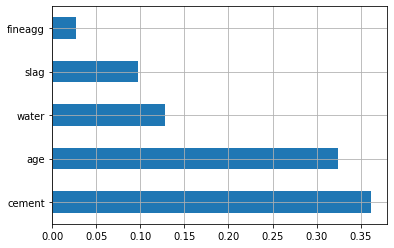

In [49]:
# plotting the parameters that our model with the best performance out of the decision tree model selections.
feat_importances = pd.Series(model_1.feature_importances_, index=x_train.columns)
feat_importances.nlargest(5).plot(kind='barh', grid = True)
plt.show()

**Observations:**
- The parameter with more importance as stablished before creating the model is the cement, followed by the age and water (which in this case is important because the content of water on a sample. can affect negativately the final strength of the model (more than the superplastic that is there to reduce water)

**SECOND MODEL (Random forest)**

In [46]:
# creating the instance of the random forest regression
model_2_rf = RandomForestRegressor(n_estimators = 100, random_state = 7)
# training the model
model_2_rf.fit(x_train, y_train)

RandomForestRegressor(random_state=7)

In [47]:
# measuring the score of the model to check how well it predicts the results
model_2_score = model_2_rf.score(x_test, y_test)
model_2_score

0.9328935772823657

**Observations:**
- We can notice that the accuracy on predicting the strength of the concrete with the random forest model is 93% which is 6% greater than the score we obtained with the decision tree model.

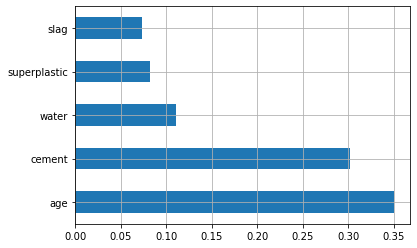

In [50]:
# plotting the parameters that our model with the best performance out of the decision tree model selections.
feat_importances = pd.Series(model_2_rf.feature_importances_, index=x_train.columns)
feat_importances.nlargest(5).plot(kind='barh', grid = True)
plt.show()

**Observations:**
- With the above plot we can notice that in this model the most important feature is the age, followed by the cement, which is the oposite of the decision tree model but makes more sense, as the cement is only one of the aggregates to create the concrete while the age tells you when the concrete reache's the force.

## CONCLUSION
- In conclusion the best model for the prediction of the strength in the concrete would be our model number 2, which have the best performance overall.